In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
flag=1

In [3]:
# data=np.load("data.npy")
data=np.load("data_dnc.npy")

In [4]:
graph=nx.from_edgelist(data[:,0:2].astype(np.int),create_using=nx.MultiDiGraph)

In [5]:
edges_label={}
for x in data:
    x1=int(x[0])
    x2=int(x[1])
    ti=x[2]
    edges_label[(x1,x2)]=("{:.0f}".format(ti))

In [6]:
undi_graph=nx.from_edgelist(data[:,0:2].astype(np.int))

In [7]:
# correct=np.loadtxt("correct.txt").astype(np.int)
# error=np.loadtxt("error.txt").astype(np.int)
# test_data=np.load("test_data.npy")
correct=np.loadtxt("correct_dnc.txt").astype(np.int)
error=np.loadtxt("error_dnc.txt").astype(np.int)
test_data=np.load("test_data_dnc.npy")

In [8]:
test_data_edges=set()
for interation in test_data:
    temp=(int(interation[0]),int(interation[1]))
    test_data_edges.add(temp)

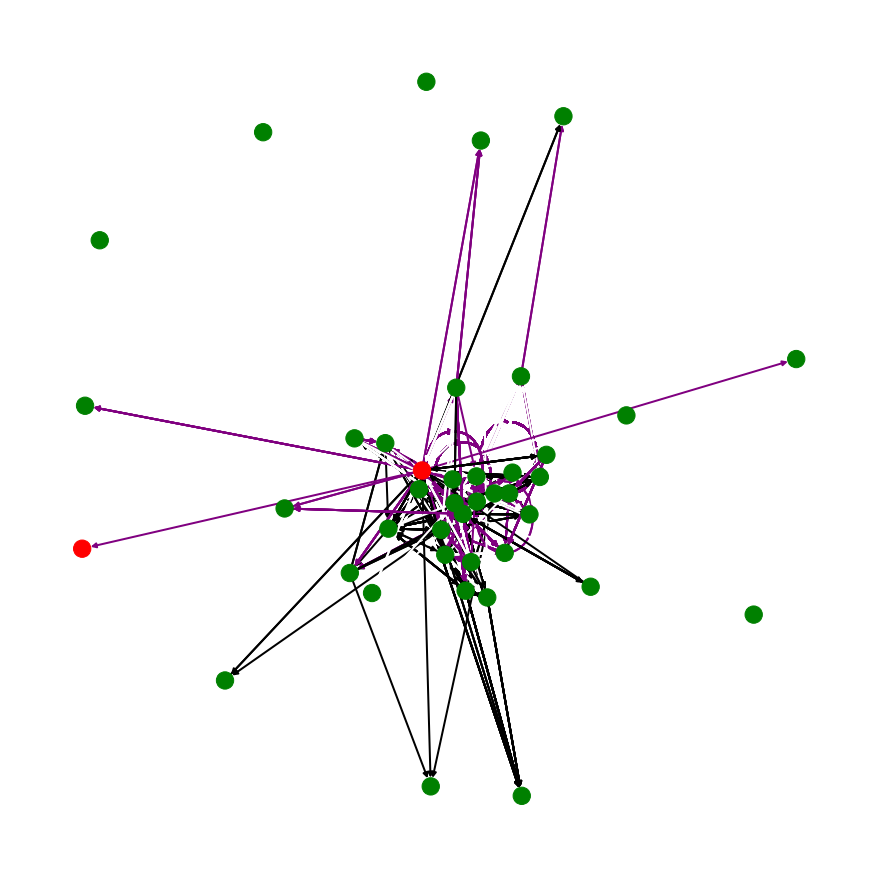

In [15]:
ind=np.random.randint(min(len(correct),len(error))) #数组下标
k=1 #路径长度
s,t=test_data[error[ind],0:2].astype(np.int) #correct
# s,t=test_data[error[ind],0:2].astype(np.int) #error
nodes=set()
sk=nx.single_source_shortest_path(undi_graph,s,cutoff=k)
for key in sk:
    nodes.add(key)
tk=nx.single_source_shortest_path(undi_graph,t,cutoff=k)
for key in tk:
    nodes.add(key)


subgraph=graph.subgraph(nodes)
edge_l={}
edge_colors=[]
target=(s,t)
thre=20
cur=int(edges_label[target])
for x in subgraph.edges:
    temp=(x[0],x[1])
    edge_colors.append("black" if temp not in test_data_edges else "purple")
    prev=int(edges_label[temp])
    if cur-prev>=thre:
        edge_colors[-1]='white'
    
color_map = ['red' if node == s or node==t else 'green' for node in subgraph]
pos = nx.spring_layout(subgraph,k=0.7,iterations=50)
plt.figure(figsize=(12,12))
nx.draw(subgraph,pos,node_color=color_map,node_size=300,width=2,edge_color=edge_colors)
# nx.draw_networkx_edge_labels(subgraph,pos,edge_labels=edge_l)
plt.show()

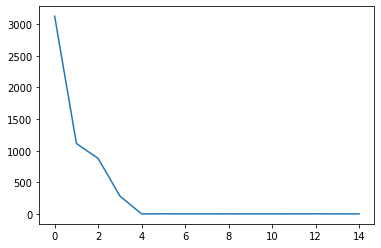

In [10]:
ind=np.random.randint(min(len(correct),len(error))) #数组下标
k=1 #路径长度
s,t=test_data[error[ind],0:2].astype(np.int) #correct
# s,t=test_data[error[ind],0:2].astype(np.int) #error
nodes=set()
sk=nx.single_source_shortest_path(undi_graph,s,cutoff=k)
for key in sk:
    nodes.add(key)
tk=nx.single_source_shortest_path(undi_graph,t,cutoff=k)
for key in tk:
    nodes.add(key)

subgraph=graph.subgraph(nodes)
thre=168
target=(s,t)
cur=int(edges_label[target])
import math
cur=int(edges_label[target])
arr=[0]*300
for x in subgraph.edges:
    temp=(x[0],x[1])
    prev=int(edges_label[temp])
    if prev>cur:
        continue
    i=math.floor((cur-prev)/thre)
    arr[i]+=1
import matplotlib.pyplot as plt
plt.plot(arr[0:15])


In [16]:
thre=20
k=1
edge_nums=[0]*len(data)
i=0
for inter in data:
    s,t=inter[0],inter[1]
    target=(s,t)
    cur=int(edges_label[target])
    nodes=set()
    sk=nx.single_source_shortest_path(undi_graph,s,cutoff=k)
    for key in sk:
        nodes.add(key)
    tk=nx.single_source_shortest_path(undi_graph,t,cutoff=k)
    for key in tk:
        nodes.add(key)

    subgraph=graph.subgraph(nodes)

    for x in subgraph.edges:
        temp=(x[0],x[1])
        prev=int(edges_label[temp])
        if cur-prev>=0 and cur-prev<=thre:
            i+=1
    
    

KeyboardInterrupt: 

In [25]:
node2edges={}
k=1
for inter in data:
    s,t=int(inter[0]),int(inter[1])
    # target=(s,t)
    if s not in node2edges:
        node2edges[s]=[]
        nodes=set()
        sk=nx.single_source_shortest_path(undi_graph,s,cutoff=k)
        for key in sk:
            nodes.add(key)
        subgraph=graph.subgraph(nodes)
        for x in subgraph.edges:
            temp=(x[0],x[1])
            prev=int(edges_label[temp])
            temp=(*temp,prev)
            node2edges[s].append(temp)
        node2edges[s]=sorted(node2edges[s],key=lambda e:e[2])

    if t not in node2edges:
        node2edges[t]=[]
        tk=nx.single_source_shortest_path(undi_graph,t,cutoff=k)
        for key in tk:
            nodes.add(key)
        subgraph=graph.subgraph(nodes)
        for x in subgraph.edges:
            temp=(x[0],x[1])
            prev=int(edges_label[temp])
            temp=(*temp,prev)
            node2edges[t].append(temp)
        node2edges[t]=sorted(node2edges[t],key=lambda e:e[2])

    # cur=int(edges_label[target])
    # nodes=set()
    # sk=nx.single_source_shortest_path(undi_graph,s,cutoff=k)
    # for key in sk:
    #     nodes.add(key)
    # tk=nx.single_source_shortest_path(undi_graph,t,cutoff=k)
    # for key in tk:
    #     nodes.add(key)

    # subgraph=graph.subgraph(nodes)

    # for x in subgraph.edges:
    #     temp=(x[0],x[1])
    #     prev=int(edges_label[temp])
    #     temp=(*temp,prev)
    #     node2edges[s].app
    #     # if cur-prev>=0 and cur-prev<=thre:
    #     #     i+=1
    
    

In [37]:
thre=20
edge_nums=[-1]*len(data)
i=0
for inter in data:
    s,t=int(inter[0]),int(inter[1])
    cur=inter[2]
    for tmp in node2edges[s]:
        if 0<=cur-tmp[2]:
            if cur-tmp[2]<=thre:
                edge_nums[i]+=1
        else:
            break
    for tmp in node2edges[t]:
        if 0<=cur-tmp[2]<=thre:
            if cur-tmp[2]<=thre:
                edge_nums[i]+=1
        else:
            break
    i+=1
    

In [33]:
import math
print(max(edge_nums))
print(sum(edge_nums)/len(edge_nums))
print(min(edge_nums))

5127
203.89501833740832
-1


In [38]:
edge_nums2=list(map(lambda x:0 if x<0 else x,edge_nums))

(array([3.4927e+04, 2.0800e+03, 1.4210e+03, 3.7400e+02, 1.6700e+02,
        6.0000e+01, 6.6000e+01, 1.4400e+02, 2.1000e+01, 4.0000e+00]),
 array([   0. ,  512.7, 1025.4, 1538.1, 2050.8, 2563.5, 3076.2, 3588.9,
        4101.6, 4614.3, 5127. ]),
 <BarContainer object of 10 artists>)

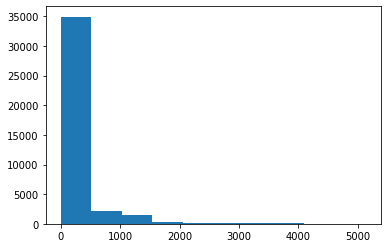

In [39]:
plt.hist(edge_nums2)

In [11]:
print('correct: ',len(correct))
print('error: ',len(error))

correct:  3815
error:  112


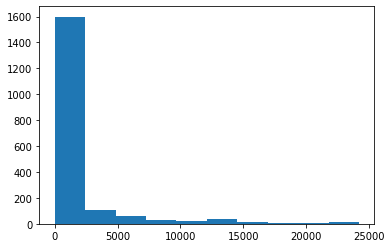

In [41]:
tmp=[0]*len(node2edges)
i=0
for key in node2edges:
    tmp[i]=len(node2edges[key])
    i+=1
plt.hist(tmp)
plt.show()

In [42]:
sum(tmp)

3083479